In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from tqdm import tqdm
import matplotlib.pyplot as plt

from model import KAN

In [4]:
# Load MNIST dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])),
    batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 141537227.12it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 29748451.33it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 31362595.56it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5261123.66it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
# Define model
model = KAN(input_features= 28 * 28, output_features=10, layers_hidden=[64])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Define loss
criterion = nn.CrossEntropyLoss()

In [6]:
# Lists to store training loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    with tqdm(train_loader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.view(-1, 28 * 28)
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            accuracy = (output.argmax(dim=1) == labels).float().mean()

            epoch_loss += loss.item()
            epoch_acc += accuracy.item()

            pbar.set_postfix(
                loss=loss.item(),
                accuracy=accuracy.item(),
                lr=optimizer.param_groups[0]["lr"],
            )

        # Calculate average loss and accuracy for the epoch
        avg_loss = epoch_loss / len(train_loader)
        avg_acc = epoch_acc / len(train_loader)

        train_losses.append(avg_loss)
        train_accuracies.append(avg_acc)

        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f} - Accuracy: {avg_acc:.4f}")


    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28 * 28)

            images = images.to(device)
            labels = labels.to(device)

            output = model(images)
            val_loss += criterion(output, labels).item()
            val_accuracy += (output.argmax(dim=1) == labels).float().mean().item()

    # Calculate average loss and accuracy for the validation
    val_loss /= len(test_loader)
    val_accuracy /= len(test_loader)

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

100%|██████████| 938/938 [00:53<00:00, 17.67it/s, accuracy=0.906, loss=0.463, lr=0.001]


Epoch 1/10 - Loss: 0.3568 - Accuracy: 0.8962
Val Loss: 0.22355958408302373, Val Accuracy: 0.9331210191082803


100%|██████████| 938/938 [00:53<00:00, 17.43it/s, accuracy=1, loss=0.0386, lr=0.001]


Epoch 2/10 - Loss: 0.1863 - Accuracy: 0.9443
Val Loss: 0.17702857575195421, Val Accuracy: 0.9475517515923567


100%|██████████| 938/938 [00:51<00:00, 18.07it/s, accuracy=1, loss=0.071, lr=0.001]


Epoch 3/10 - Loss: 0.1382 - Accuracy: 0.9582
Val Loss: 0.16243262216300483, Val Accuracy: 0.9505374203821656


100%|██████████| 938/938 [00:51<00:00, 18.36it/s, accuracy=0.938, loss=0.104, lr=0.001]


Epoch 4/10 - Loss: 0.1090 - Accuracy: 0.9676
Val Loss: 0.13703017753762473, Val Accuracy: 0.9598925159235668


100%|██████████| 938/938 [00:51<00:00, 18.12it/s, accuracy=1, loss=0.032, lr=0.001]


Epoch 5/10 - Loss: 0.0889 - Accuracy: 0.9720
Val Loss: 0.13931078624846355, Val Accuracy: 0.9579020700636943


100%|██████████| 938/938 [00:50<00:00, 18.40it/s, accuracy=1, loss=0.00488, lr=0.001]


Epoch 6/10 - Loss: 0.0742 - Accuracy: 0.9770
Val Loss: 0.12143216854455187, Val Accuracy: 0.9650676751592356


100%|██████████| 938/938 [00:50<00:00, 18.47it/s, accuracy=1, loss=0.00485, lr=0.001]


Epoch 7/10 - Loss: 0.0622 - Accuracy: 0.9798
Val Loss: 0.15034176722824408, Val Accuracy: 0.9570063694267515


100%|██████████| 938/938 [00:50<00:00, 18.46it/s, accuracy=1, loss=0.0108, lr=0.001]


Epoch 8/10 - Loss: 0.0518 - Accuracy: 0.9831
Val Loss: 0.1589230483013745, Val Accuracy: 0.9547173566878981


100%|██████████| 938/938 [00:51<00:00, 18.36it/s, accuracy=1, loss=0.0146, lr=0.001]


Epoch 9/10 - Loss: 0.0436 - Accuracy: 0.9853
Val Loss: 0.14495330448462598, Val Accuracy: 0.9599920382165605


100%|██████████| 938/938 [00:50<00:00, 18.55it/s, accuracy=1, loss=0.0143, lr=0.001]


Epoch 10/10 - Loss: 0.0377 - Accuracy: 0.9879
Val Loss: 0.14180603791918986, Val Accuracy: 0.9615843949044586


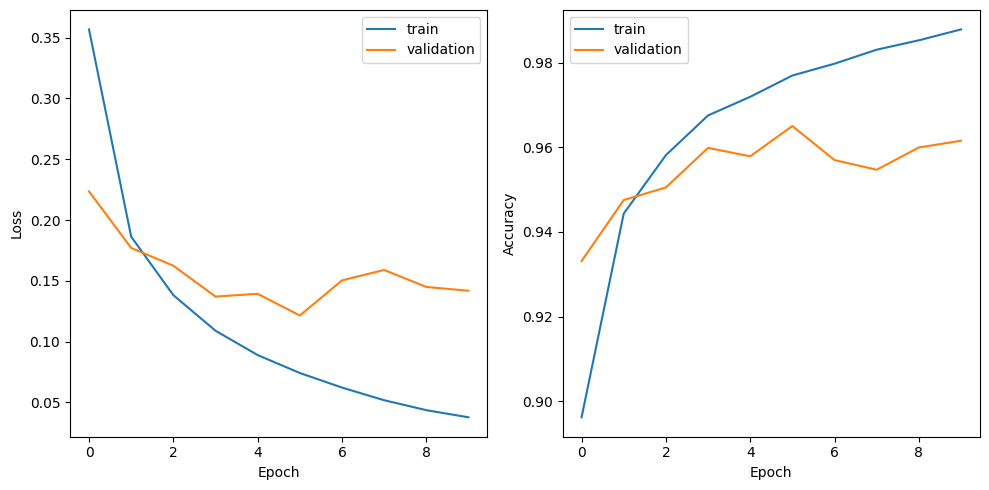

In [7]:
# Plot training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label="train")
plt.plot(range(num_epochs), val_losses, label="validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label="train")
plt.plot(range(num_epochs), val_accuracies, label="validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()